In [44]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist


import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('dataset_top_50_music_daily_spotify_id_scraping_2024.csv')

In [4]:
df.columns

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'country',
       'snapshot_date', 'popularity', 'is_explicit', 'duration_ms',
       'album_name', 'album_release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [5]:
df['is_explicit'] = df['is_explicit'].map({True: 1, False: 0})

In [6]:
df.shape

(5155, 23)

#### Cek Dataset 5 Data Teratas

In [7]:
df.head()

,spotify_id,name,artists,daily_rank,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,6EIMUjQ7Q8Zr2VtIUik4He,drunk text,Henry Moodie,1,ID,4/14/2024,84,0,187263,in all of my lonely nights,...,0,-5.356,1,0.0314,0.0676,0.000000,0.1130,0.176,94.784,3
1,3qhlB30KknSejmIvZZLjOD,End of Beginning,Djo,2,ID,4/14/2024,99,0,159245,DECIDE,...,2,-7.643,1,0.0584,0.0351,0.002590,0.0707,0.912,159.982,4
2,51ZQ1vr10ffzbwIjDCwqm4,we can't be friends (wait for your love),Ariana Grande,3,ID,4/14/2024,95,0,228639,eternal sunshine,...,5,-8.305,1,0.0447,0.0657,0.000032,0.0751,0.287,115.830,4
3,7F4tV8SiUy6itZTdAzdafO,penjaga hati,Nadhif Basalamah,4,ID,4/14/2024,83,0,260346,penjaga hati,...,2,-8.993,1,0.0279,0.8790,0.028900,0.1900,0.329,155.799,4
4,2lMQOAKPam2JVEfNsZtWDe,Tak Dianggap,Lyodra,5,ID,4/14/2024,83,0,179841,Tak Dianggap,...,2,-5.737,1,0.0433,0.8020,0.000000,0.2130,0.302,126.000,4


#### Cek Dataset 5 Data Paling Bawah

In [8]:
df.tail()

,spotify_id,name,artists,daily_rank,country,snapshot_date,popularity,is_explicit,duration_ms,album_name,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
5150,2UgCs0i0rNHUH2jKE5NZHE,Sempurna,Andra & The Backbone,46,ID,1/1/2024,78,0,268422,Andra & The Backbone,...,4,-9.946,1,0.0308,0.7260,0.000000,0.1050,0.384,115.499,3
5151,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,47,ID,1/1/2024,86,0,196453,Plastic Hearts,...,5,-4.035,1,0.0313,0.0981,0.000000,0.1000,0.494,121.981,4
5152,2wAiFWjRupWmnDkQcu91MF,Rumah Ke Rumah,Hindia,48,ID,1/1/2024,77,0,277457,Menari Dengan Bayangan,...,11,-7.396,1,0.0319,0.4560,0.616000,0.1860,0.488,116.032,4
5153,6SITe0StjnWHjyNOVzyJTX,Trauma,"Aan Story, Elsya",49,ID,1/1/2024,78,0,218073,Trauma,...,4,-7.405,1,0.0329,0.8300,0.000000,0.0812,0.401,115.997,4
5154,4AfhlJghKIWkXa8sfFEXVd,Bunga Hati,Salma Salsabil,50,ID,1/1/2024,75,0,173720,Bunga Hati,...,6,-5.372,0,0.0460,0.6800,0.000001,0.1020,0.423,93.118,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5155 entries, 0 to 5154
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          5155 non-null   object 
 1   name                5155 non-null   object 
 2   artists             5155 non-null   object 
 3   daily_rank          5155 non-null   int64  
 4   country             5155 non-null   object 
 5   snapshot_date       5155 non-null   object 
 6   popularity          5155 non-null   int64  
 7   is_explicit         5155 non-null   int64  
 8   duration_ms         5155 non-null   int64  
 9   album_name          5155 non-null   object 
 10  album_release_date  5155 non-null   object 
 11  danceability        5155 non-null   float64
 12  energy              5155 non-null   float64
 13  key                 5155 non-null   int64  
 14  loudness            5155 non-null   float64
 15  mode                5155 non-null   int64  
 16  speech

#### Cek duplikasi setiap kolom

In [10]:
df.nunique()

spotify_id             93
name                   88
artists                72
daily_rank             50
country                 1
snapshot_date         103
popularity             55
is_explicit             2
duration_ms            87
album_name             86
album_release_date     82
danceability           82
energy                 86
key                    12
loudness               90
mode                    2
speechiness            75
acousticness           88
instrumentalness       58
liveness               76
valence                87
tempo                  91
time_signature          3
dtype: int64

#### Melihat apakah ada missing value

In [11]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
spotify_id            0
name                  0
artists               0
daily_rank            0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64


In [12]:
data_types = df.dtypes
print("\nData Types:")
print(data_types)


Data Types:
spotify_id             object
name                   object
artists                object
daily_rank              int64
country                object
snapshot_date          object
popularity              int64
is_explicit             int64
duration_ms             int64
album_name             object
album_release_date     object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
dtype: object


#### Ringkasan Statistik Dalam Kolom Numerik 

In [13]:
summary_stats_numeric = df.describe()
print("\nRingkasan Statistik Dalam Numerik:")
print(summary_stats_numeric)


Ringkasan Statistik Dalam Numerik:
        daily_rank   popularity  is_explicit    duration_ms  danceability  \
count  5155.000000  5155.000000  5155.000000    5155.000000   5155.000000   
mean     25.479534    81.517750     0.019787  234167.610863      0.529290   
std      14.431690     6.719346     0.139280   44541.994390      0.103603   
min       1.000000     0.000000     0.000000   92400.000000      0.252000   
25%      13.000000    78.000000     0.000000  209647.000000      0.464000   
50%      25.000000    80.000000     0.000000  231100.000000      0.531000   
75%      38.000000    84.000000     0.000000  261299.000000      0.599000   
max      50.000000   100.000000     1.000000  325147.000000      0.797000   

            energy          key     loudness         mode  speechiness  \
count  5155.000000  5155.000000  5155.000000  5155.000000  5155.000000   
mean      0.505471     4.788749    -7.738739     0.892726     0.041798   
std       0.176710     3.408342     2.447973    

In [14]:
unique_values_categorical = df.select_dtypes(include=['object']).nunique()
print("\nNilai Unik dalam Kolom Kategorikal:")
print(unique_values_categorical)


Nilai Unik dalam Kolom Kategorikal:
spotify_id             93
name                   88
artists                72
country                 1
snapshot_date         103
album_name             86
album_release_date     82
dtype: int64


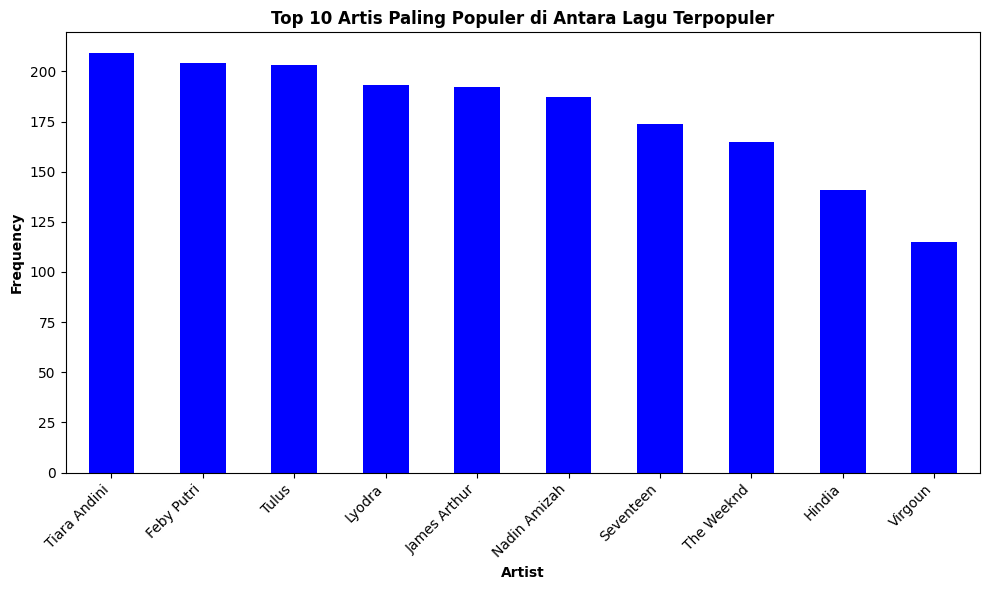

In [15]:
artists_list = df['artists'].str.split(', ').explode()

artists_count = artists_list.value_counts()

# Top 10 Artis Paling Populer
top_artists = artists_count.head(10)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='blue')
plt.title('Top 10 Artis Paling Populer di Antara Lagu Terpopuler',fontweight='bold')
plt.xlabel('Artist', fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Artis Yang Paling Sering Populer 

#### Disini menampilkah 10 artis yang sering populer dari 2024

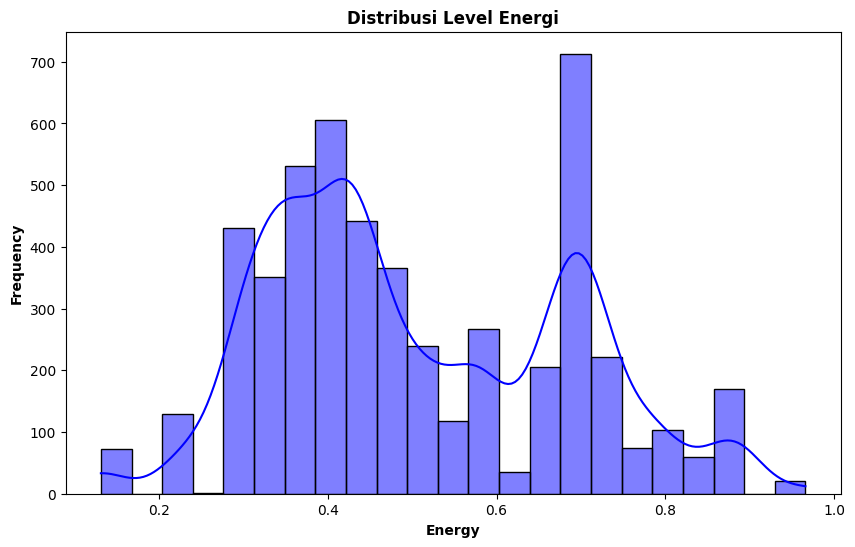

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['energy'], kde=True, color='b')
plt.xlabel('Energy', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribusi Level Energi', fontweight='bold')
plt.show()

### Distribusi Energi
#### Dari rata lagu yang sering populer yaitu di angka 0.7 yang berarti, lagu-lagu dengan tingkat energi sekitar 0.7 mungkin termasuk dalam genre pop yang ceria atau rock yang energik tetapi tidak terlalu berat. Mereka mungkin memiliki tempo yang cukup cepat dan terdengar menggerakkan, tetapi tidak seintens lagu-lagu metal atau lagu-lagu dansa yang sangat cepat. Lagu-lagu ini cocok untuk suasana santai atau pun lagu yang sedih galau yang lebih aktif tanpa terlalu memacu adrenalin secara berlebihan.


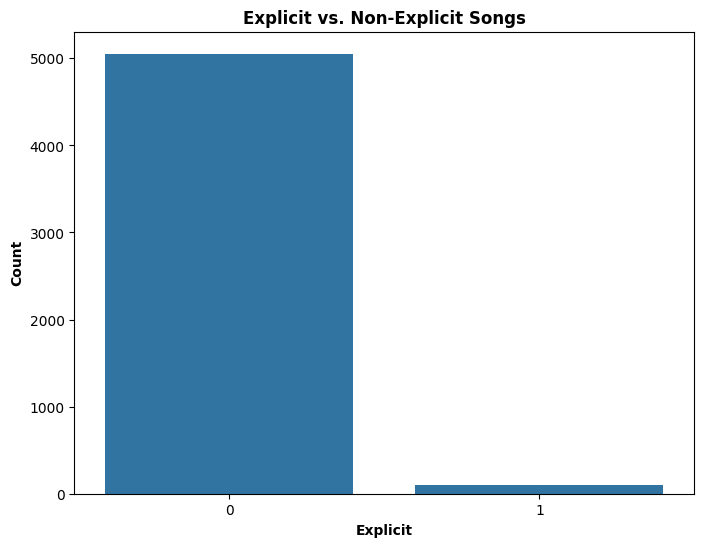

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_explicit', data=df)
plt.xlabel('Explicit', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Explicit vs. Non-Explicit Songs', fontweight='bold')
plt.show()

### Explicit True or False

#### Dari musik populer di indonesia 2024, audiens tidak suka dengan lagu yang mengandung explicit atau lagu tersebut tidak mengandung konten yang dianggap kasar, cabul, atau tidak pantas secara eksplisit.

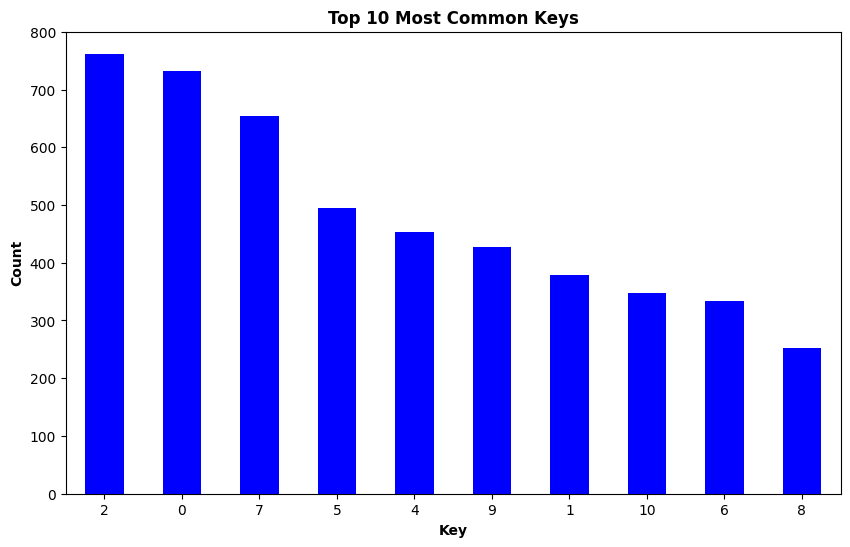

In [18]:
top_10_keys = df['key'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_keys.plot(kind='bar', color='blue')
plt.xlabel('Key', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 Most Common Keys', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

### Key
#### Dari 2 teratas kunci musik terbanyak terdapat kunci 0, ini sebenarnya mewakili kunci C. Kunci C adalah salah satu kunci yang paling umum digunakan dalam musik karena memiliki struktur yang relatif mudah dan netral. Lagu-lagu dengan kunci C cenderung memiliki melodi dan harmoni yang sederhana dan mudah diikuti. Contoh genre musik yang sering menggunakan kunci C adalah musik pop, folk, atau bahkan beberapa lagu rock.

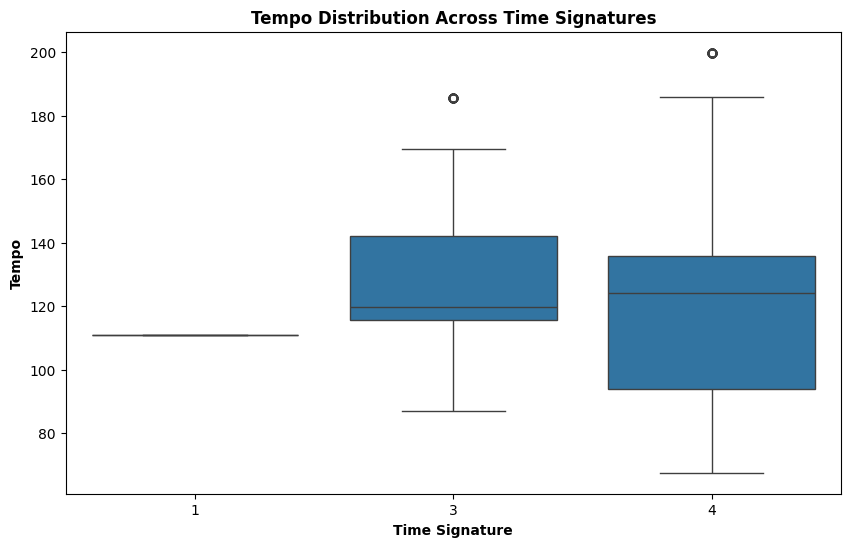

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_signature', y='tempo', data=df)
plt.xlabel('Time Signature', fontweight='bold')
plt.ylabel('Tempo', fontweight='bold')
plt.title('Tempo Distribution Across Time Signatures', fontweight='bold')
plt.show()

### Distribusi Tempo Berdasarkan Tanda Waktu dalam Musik
#### Berdasarkan nilai median tempo lagu-lagu dengan tanda waktu 3/4 sebesar 120 BPM (Beat Per Minute), dapat disimpulkan bahwa lagu-lagu tersebut cenderung memiliki tempo yang moderat. Median ini menunjukkan bahwa sebagian besar lagu memiliki tempo di sekitar 120 BPM, yang dapat dianggap sebagai tempo yang cukup umum dan nyaman untuk lagu-lagu dengan tanda waktu 3/4.



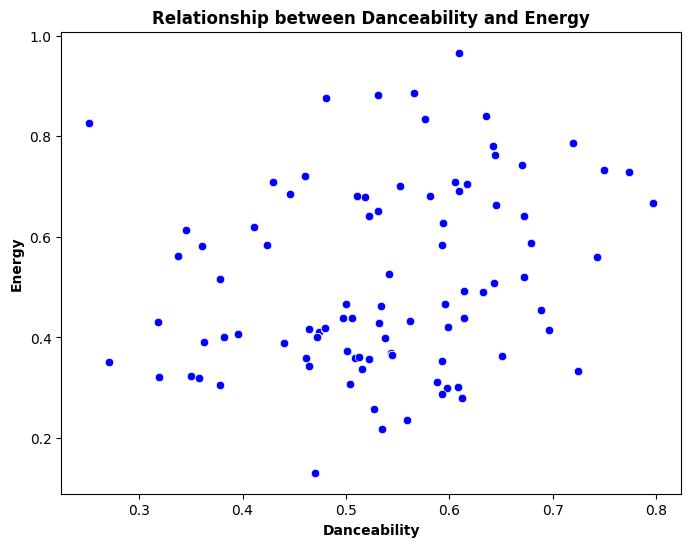

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability', y='energy', data=df, color='b')
plt.xlabel('Danceability', fontweight='bold')
plt.ylabel('Energy', fontweight='bold')
plt.title('Relationship between Danceability and Energy', fontweight='bold')
plt.show()

#### Berdasarkan plot scatter yang Anda tunjukkan, jika lagu-lagu dalam data Anda memiliki tingkat energy yang banyak pada 0.4 dan tingkat danceability pada 0.5, maka dapat disimpulkan bahwa lagu-lagu tersebut cenderung memiliki tingkat energi yang rendah hingga sedang dan tingkat kemungkinan untuk menari yang moderat. Ini berarti lagu-lagu tersebut mungkin terdengar lebih tenang atau santai dan cocok untuk suasana yang lebih rileks, tanpa memerlukan gerakan yang terlalu aktif atau cepat saat menari.

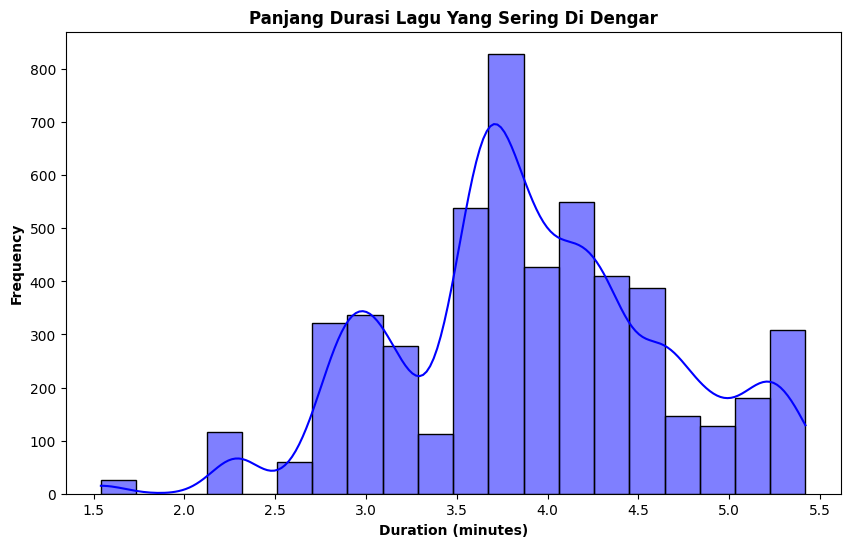

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'] / 60000, bins=20, kde=True, color='b')
plt.xlabel('Duration (minutes)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Panjang Durasi Lagu Yang Sering Di Dengar', fontweight='bold')
plt.show()

### Panjang durasi yang sering di dengar
#### Disini menjunjukan bahwa musik dengan 3.7 menit paling sering di dengar selama 2024 di indonesia

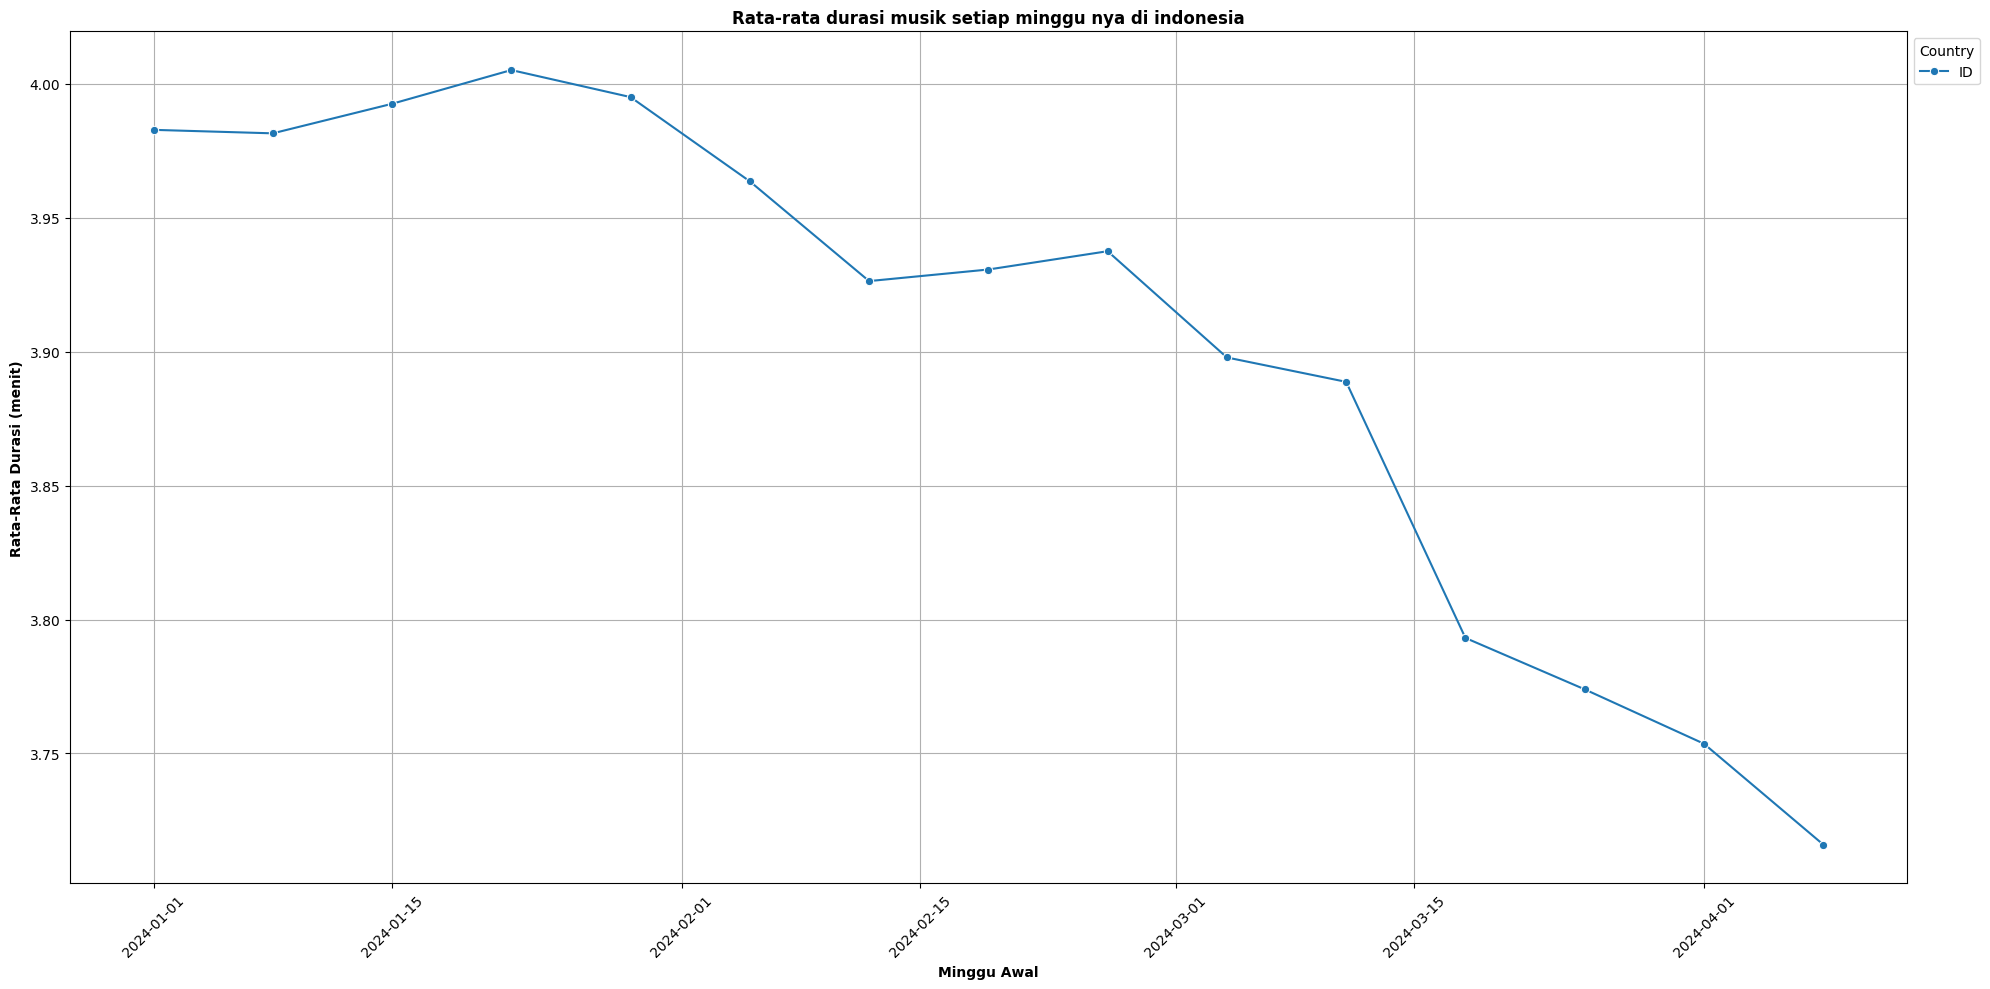

In [22]:
# Ubah kolom 'snapshot_date' menjadi tipe data datetime jika
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

# Kelompokkan data berdasarkan negara dan minggu
df['week_start'] = df['snapshot_date'].dt.to_period('W').dt.start_time
avg_duration_by_country_week = df.groupby(['country', 'week_start'])['duration_ms'].mean() / 60000

# Ubah hasil penghitungan menjadi DataFrame
avg_duration_df = avg_duration_by_country_week.reset_index()

# Membuat plot
plt.figure(figsize=(20, 10))
sns.lineplot(x='week_start', y='duration_ms', hue='country', data=avg_duration_df, marker='o')
plt.xlabel('Minggu Awal', fontweight='bold')
plt.ylabel('Rata-Rata Durasi (menit)', fontweight='bold')
plt.title('Rata-rata durasi musik setiap minggu nya di indonesia', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



### Rata Rata Durasi Musik
#### Disini bisa kita lihat dari awal minggu 2024 menunjukan bahawa hanya ada sedikit kenaikan dan ke minggu berikut nya mengalami trend menurun yang menujukan bahwa audiens semakin lebih suka dengan musik yang tidak terlalu lama

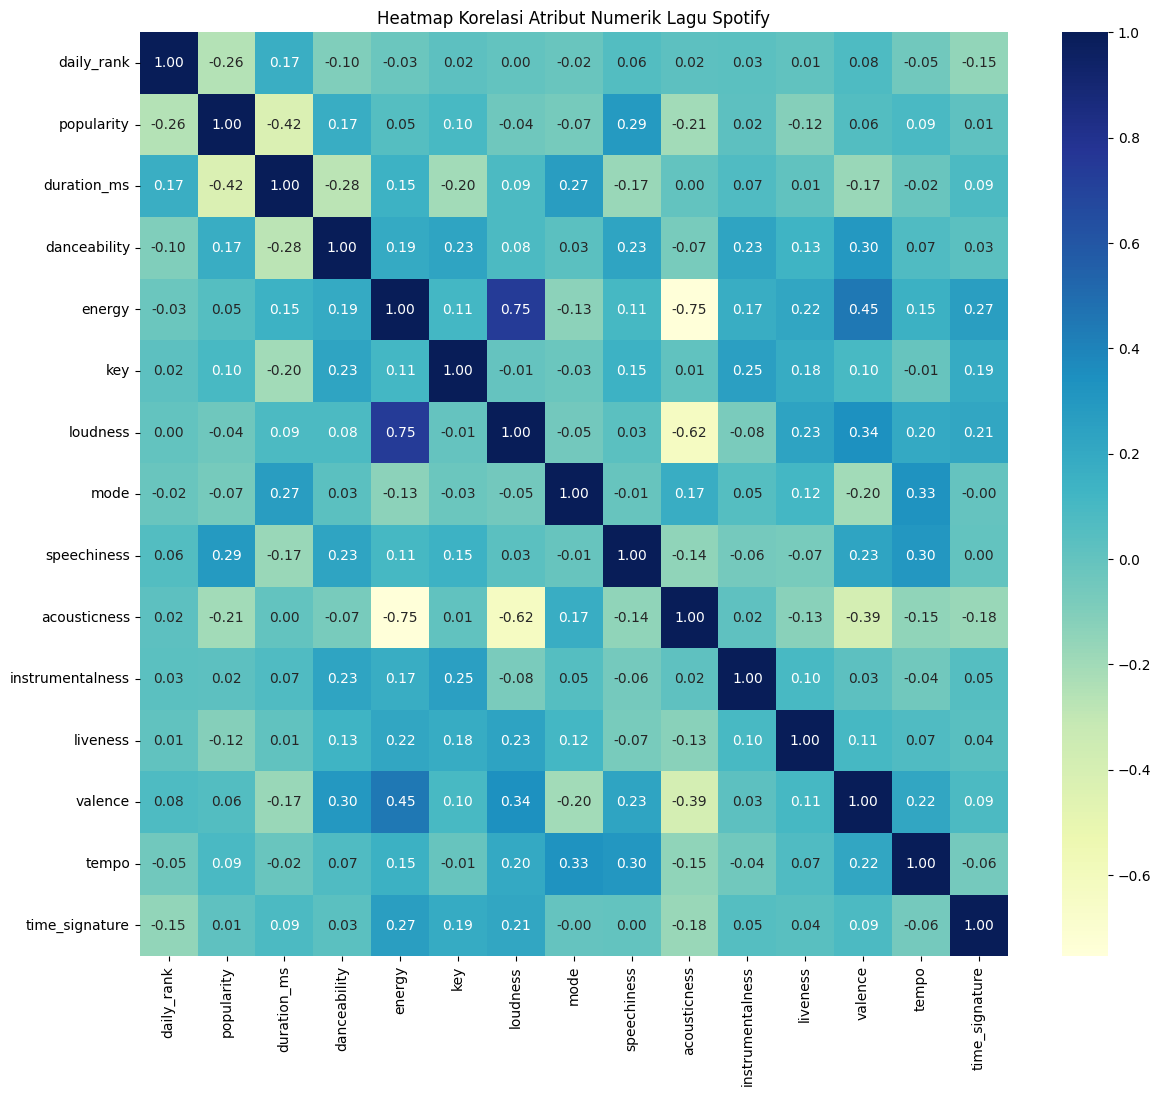

In [23]:
# Memilih kolom numerik untuk heatmap
numeric_columns = ['daily_rank', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                   'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
numeric_df = df[numeric_columns]

# Menghitung korelasi antar variabel numerik
correlation_matrix = numeric_df.corr()

# Membuat heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Heatmap Korelasi Atribut Numerik Lagu Spotify')
plt.show()

In [36]:
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('dataset_top_50_music_daily_spotify_id_scraping_2024.csv')
data['is_explicit'] = data['is_explicit'].map({True: 1, False: 0})


In [37]:
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = data.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [38]:
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
normarization = data.select_dtypes(include=datatypes)
for col in normarization.columns:
    MinMaxScaler(col)

In [45]:
from sklearn.cluster import KMeans
import seaborn as sns
from tqdm import tqdm
sns.set()


In [46]:
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(normarization)

In [47]:
data['features'] = features
MinMaxScaler(data['features'])

MinMaxScaler(feature_range=0       6
1       2
2       8
3       3
4       2
       ..
5150    3
5151    6
5152    7
5153    0
5154    2
Name: features, Length: 5155, dtype: int32)

In [48]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 2, 1, 10, 3, 4, 5, 9]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

In [49]:
recommendations = Spotify_Recommendation(data)
recommendations.recommend("Monokrom", 1)

100%|███████████████████████████████████████████████████████████████████████████| 5054/5054 [00:00<00:00, 18662.34it/s]


,artists,name
3497,Bruno Mars,When I Was Your Man
